# LLE Demonstration
References:  
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html#sklearn.manifold.LocallyLinearEmbedding 


In [1]:
import numpy as np
import cv2 as cv

In [2]:
# Parameters to be used everywhere
shape = (400,300,3)
resize = (300,400) # for some reason this is backward in opencv


In [3]:
def vec_to_image(vec, shape):
    vec = vec.astype(np.uint8) 
    vec = vec.reshape(shape)
    vec[vec<0] = 0
    vec[vec>255] = 255
    return vec

In [4]:
# Import and flatten our images
import os
# Eraser data
data_dir = "./spiraldata"
files = os.listdir(data_dir)
# Assume sequential naming
fuzz = 10 # Avoid over-reliance on temporal similarity
files.sort()
files = files[::fuzz]
data = []
names = []
for file in files:
    relative_path = os.path.join(data_dir, file)
    img = cv.imread(relative_path)
    if img is None:
        print(f"Invalid image file: {file}")
        continue
    img = cv.resize(img, (300,400))
    img_vec = img.flatten()
    data.append(img_vec)
    names.append(file)

Invalid image file: spiral.mp4


In [5]:
from sklearn.manifold import LocallyLinearEmbedding

In [6]:
lle = LocallyLinearEmbedding() # default settings
lle.fit(data)

LocallyLinearEmbedding()

In [7]:
output = lle.transform(data)

In [8]:
import matplotlib.pyplot as plt

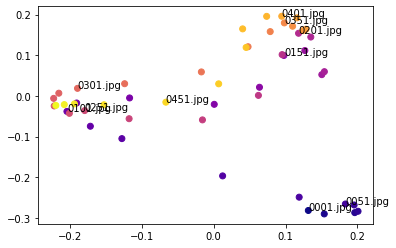

In [9]:
# Graphing the reduced components
fig = plt.figure()
ax = plt.axes()
t=np.linspace(0, 255, num=output.shape[0])
ax.scatter(output[:,0], output[:,1], c=t, cmap='plasma')
label_frac = 5 # label one in 5 of the images
for i in range(0,len(output),label_frac):
    ax.annotate(names[i],output[i])